In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler,RobustScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/산학연계/data/BISTelligen_Project_Data.csv')

In [ ]:
data.info()

,key,Pressure,Power1,Power2,Vibration_Peak1,Vibration_RMS1,Vibration_Peak2,Vibration_RMS2
0,1,1030.888889,1758.333333,1993.888889,438.298608,1.866068,1745.631110,0.890293
1,1,1019.508475,1742.881356,2095.932203,445.253134,1.870993,1615.059148,0.913187
2,1,1025.300000,1737.666667,2083.500000,452.722338,1.869140,1714.612494,0.888425
3,1,1019.383333,1751.666667,2089.833333,453.906117,1.853422,1689.548169,0.887922
4,1,1017.316667,1772.500000,2103.166667,447.134201,1.858652,1615.978827,0.881195
...,...,...,...,...,...,...,...,...
1759,6,1024.300000,1761.666667,2696.166667,471.054617,1.861856,2042.421820,1.170695
1760,6,1020.000000,1764.237288,2692.033898,465.530188,1.857697,2055.819491,1.186406
1761,6,1018.033333,1778.166667,2701.166667,450.309365,1.850355,2068.787325,1.194031
1762,6,1019.766667,1804.500000,2923.000000,470.910131,1.870685,2086.936503,1.218350


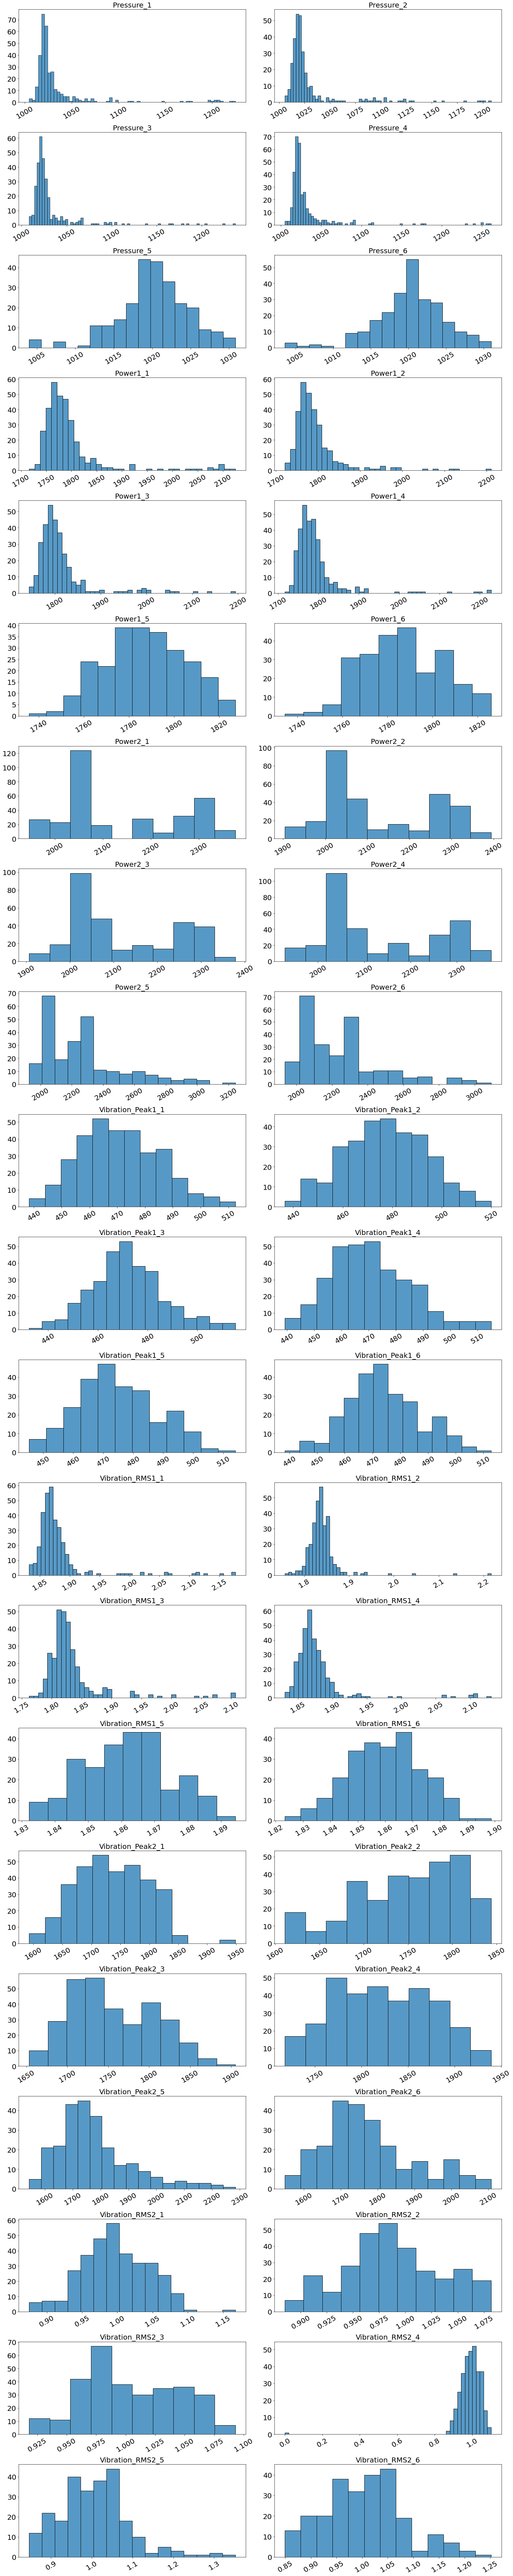

In [ ]:
fig = plt.figure(figsize=(20,100))
area = []
i=0
for col in data.columns:
    if(col=='key'):
        continue
    for num in range(1,7):
        key_data = data[data['key']==num]
        area.append(fig.add_subplot(21,2,i+1))
        sns.histplot(x=key_data[col], ax=area[i])
        title = ''.join([col,'_'+str(num)])
        plt.title(title, fontsize = 20)
        plt.xticks(rotation=30,fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('')
        plt.ylabel('')
        plt.tight_layout()
        i+=1

<AxesSubplot:>

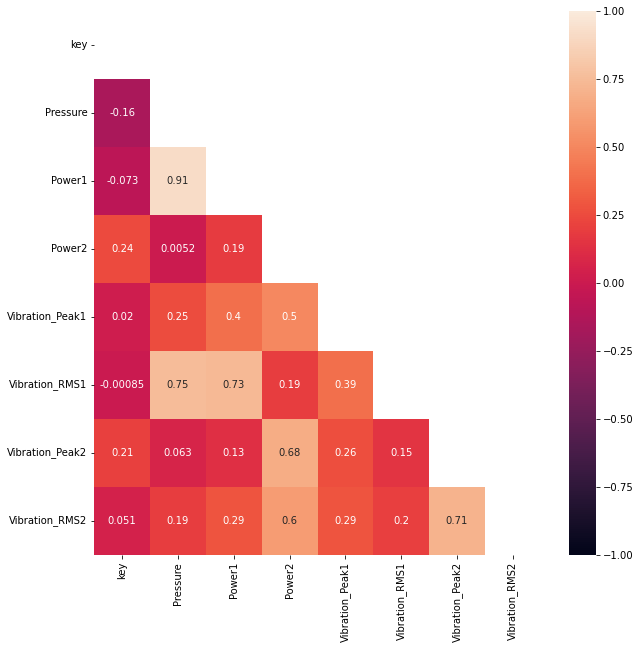

In [ ]:
mask=np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(data.corr(), vmin=-1, vmax=1,annot=True,mask=mask)

(330, 8)
(300, 8)
(308, 8)
(326, 8)
(250, 8)
(250, 8)
(330, 8)
(300, 8)
(308, 8)
(326, 8)
(250, 8)
(250, 8)
(330, 8)
(300, 8)
(308, 8)
(326, 8)
(250, 8)
(250, 8)
(330, 8)
(300, 8)
(308, 8)
(326, 8)
(250, 8)
(250, 8)
(330, 8)
(300, 8)
(308, 8)
(326, 8)
(250, 8)
(250, 8)
(330, 8)
(300, 8)
(308, 8)
(326, 8)
(250, 8)
(250, 8)
(330, 8)
(300, 8)
(308, 8)
(326, 8)
(250, 8)
(250, 8)


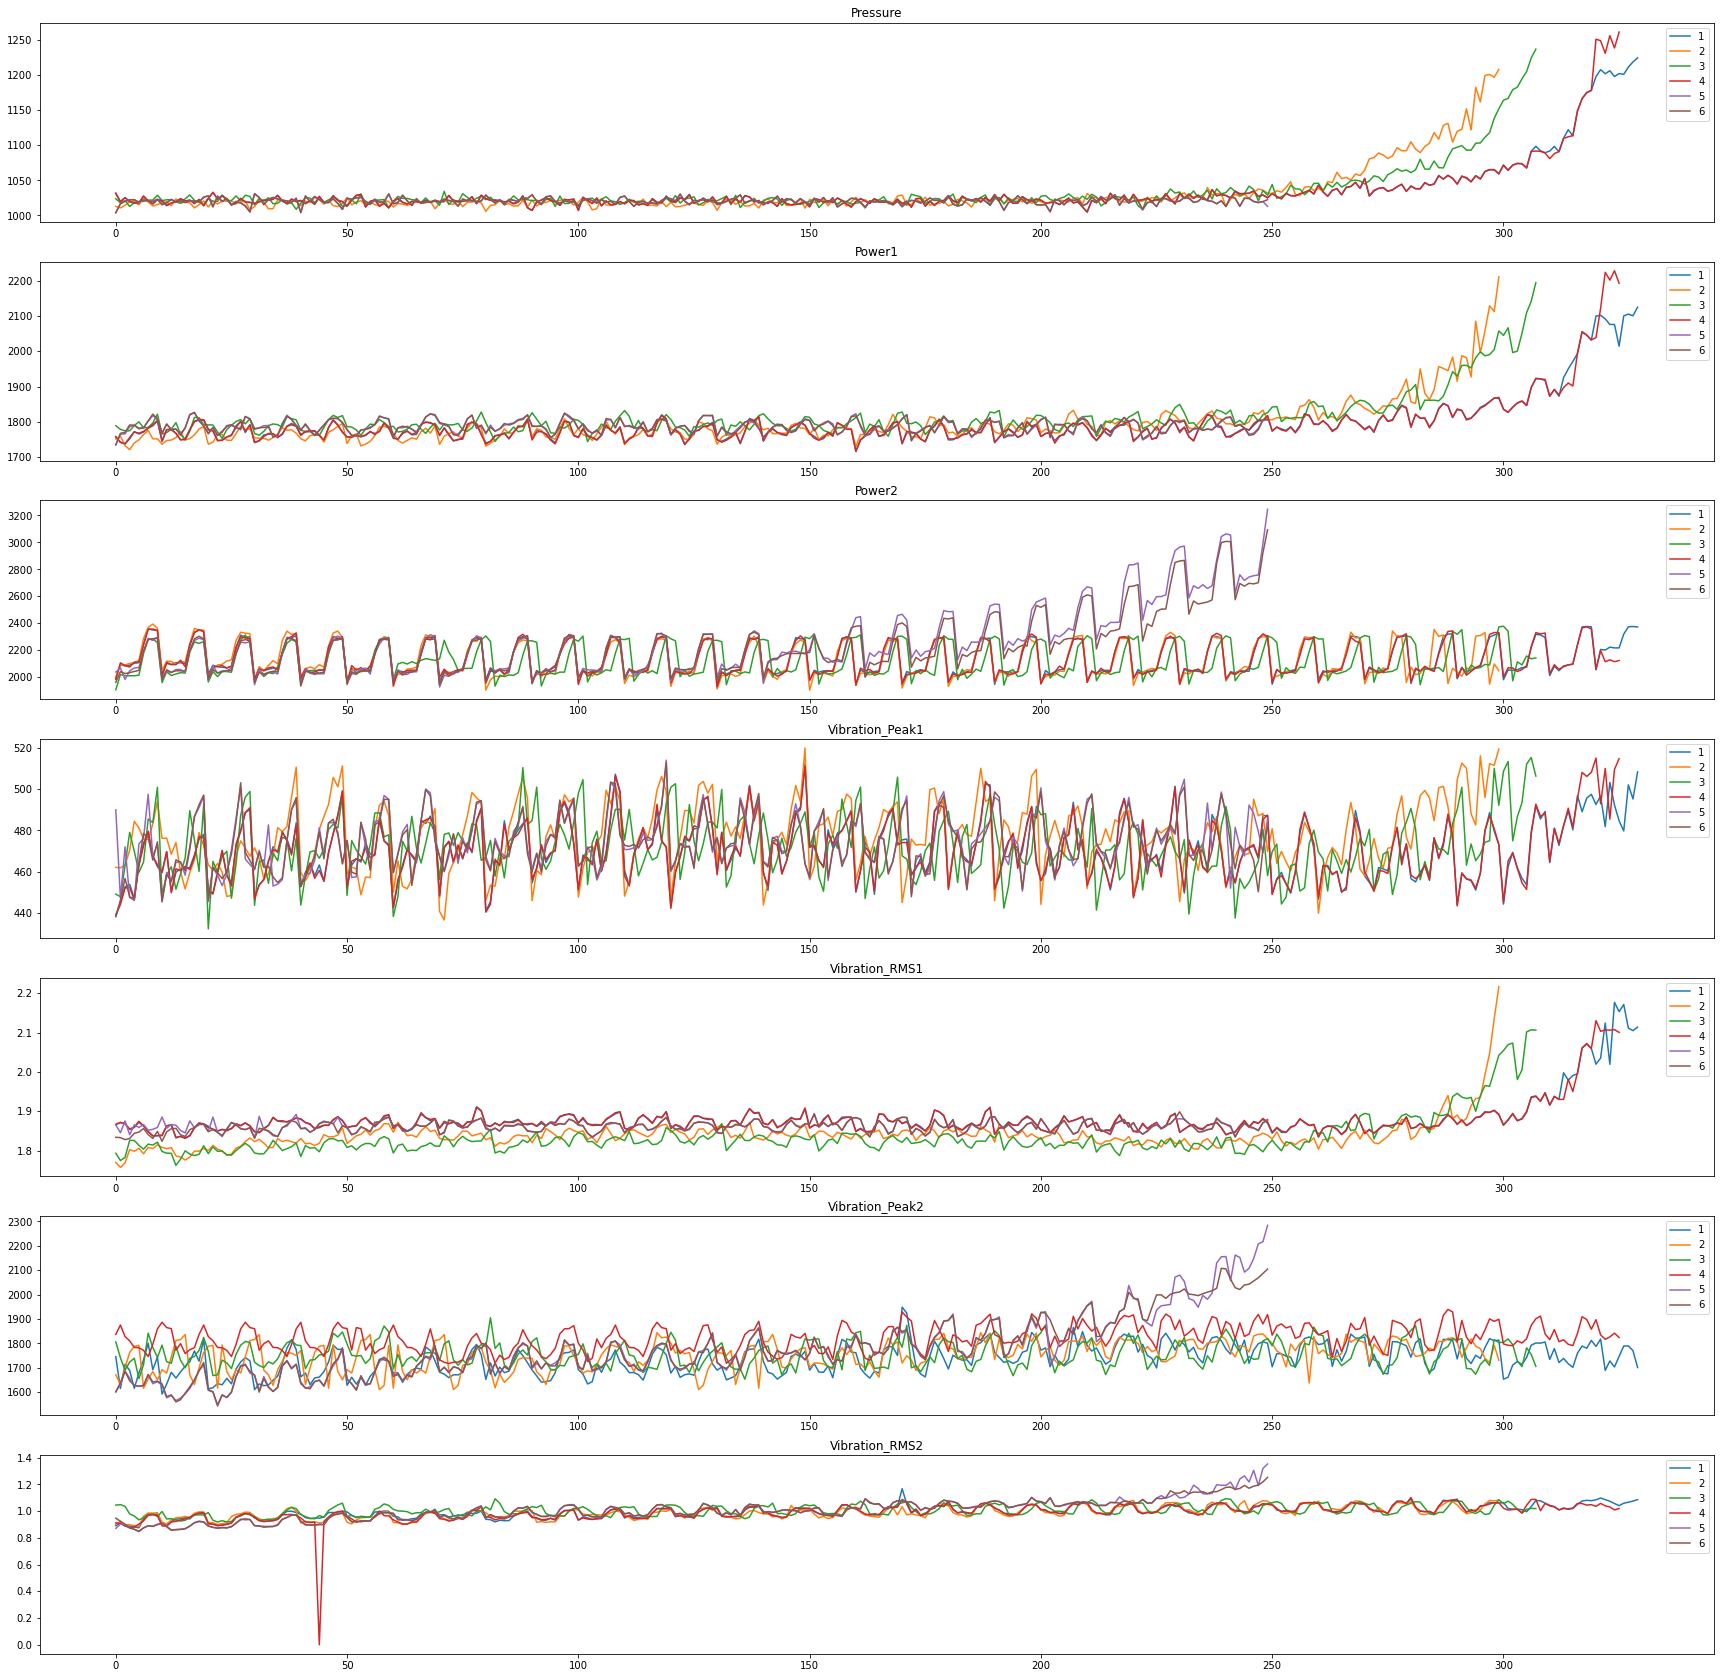

In [ ]:
fig= plt.figure(figsize= (30, 30))
a= []
i=0
for y in range(7):
    a.append(fig.add_subplot(7, 1, y+1))

#key 1~4까지 합쳐서 비교
for col in data.columns:
    if col=='key':
        continue
    for num in range(1,len(data['key'].unique())+1):
        reIndex_data= data[data['key']==num]
        reIndex_data.reset_index(inplace=True)
        reIndex_data.drop(['index', 'key'], axis=1, inplace=True)
        
        
        a[i].plot(reIndex_data.index, reIndex_data[col],label=num)
    title= col
    a[i].set_title(title)
    a[i].legend()
    i+=1

In [ ]:
data[data['Vibration_RMS2']<=0.5]

,key,Pressure,Power1,Power2,Vibration_Peak1,Vibration_RMS1,Vibration_Peak2,Vibration_RMS2
982,4,1027.24236,1761.611228,2055.250646,460.673714,1.860608,1771.662869,-0.000035


key 1,2,3,4 / key 5,6 -> 각각 비슷한 분포를 보임  
index 982 -> Vibration_RMS2 이상치 보임

In [ ]:
# noise data 발생 지점 기준으로 이전 40개 인덱스, 이후 40개 인덱스에 대한 Vibration_RMS2 평균값으로 대체
# noise data index=982, index 942~981(40개), index 983~1022(40개)
prev_sum=data[data['key']==4].loc[942:981]['Vibration_RMS2'].sum()
after_sum=data[data['key']==4].loc[983:1022]['Vibration_RMS2'].sum()
aver=(prev_sum+after_sum)/80
data.loc[data['Vibration_RMS2']<0,'Vibration_RMS2']=aver

In [ ]:
sum1 = 0
total = 0
for i in range(len(data)) :
  total += 1
  sum1 += 1
  if (i == len(data) - 1) :
    print(str(int(data.iloc[i]['key'])) + '값의 개수 : ' + str(sum1))
    print('전체 데이터셋 행개수 : ' + str(total))
    break
  else :
    if (data.iloc[i]['key'] == data.iloc[i + 1]['key']) :
      continue
    else :
      print(str(int(data.iloc[i]['key'])) + '값의 개수 : ' + str(sum1))
      sum1 = 0

In [ ]:
def correctdatamake(data, num):
  df1 = data.loc[0:(num-1), :]
  df2 = data.loc[330:(330 + (num-1)), :]
  df3 = data.loc[(330 + 300):(330 + 300 + (num-1)), :]
  df4 = data.loc[(330 + 300 + 308):(330 + 300 + 308 + (num-1)), :]
  df5 = data.loc[(330 + 300 + 308 + 326):(330 + 300 + 308 + 326 + (num-1)), :]
  df6 = data.loc[(330 + 300 + 308 + 326 + 250):(330 + 300 + 308 + 326 + 250 + (num-1)), :]
  #정상치만 모은 데이터프레임
  correct_dataframe = pd.concat([df1, df2, df3, df4, df5, df6]) 
  normal_index=correct_dataframe.index
  correct_dataframe.reset_index(drop=True, inplace=True)
  correct_dataframe.head()
  return correct_dataframe,normal_index

In [ ]:
normal_df,normal_index=correctdatamake(data, 120)
normal_df.info()

In [ ]:
for col in normal_df.columns:
    print('{} skew: {}'.format(col,normal_df[col].skew()))

In [ ]:
for col in normal_df.columns:
    print('{} skew: {}'.format(col,normal_df[col].kurt()))

In [ ]:
normal_df.describe()

In [ ]:
scaler=RobustScaler()
train_data=pd.DataFrame(scaler.fit_transform(normal_df.drop(['key'],axis=1)),columns=normal_df.columns[1:])
train_data.head()

In [ ]:
test_data=data.drop(['key'],axis=1)
test_data=pd.DataFrame(scaler.transform(test_data),columns=test_data.columns)
test_data.head()

In [ ]:
from pyod.models.iforest import IForest
from pyod.models.pca import PCA
from sklearn.neighbors import LocalOutlierFactor
from pyod.models.mcd import MCD

In [ ]:
from sklearn.decomposition import PCA
import mglearn

In [ ]:
def show_2d_scatter(data=None,label=None):
    X_pca = PCA(n_components=2).fit_transform(data)
    df_pca = pd.DataFrame(X_pca,columns=['component_0','component_1'])
    
    mglearn.discrete_scatter(df_pca['component_0'],df_pca['component_1'],label,alpha=0.8)
    plt.legend(['0','1'],loc=1)

In [ ]:
def show_3d_scatter(data=None,label=None):
    pca = PCA(n_components=3)

    df_pca = pca.fit_transform(data)
    df_pca = pd.DataFrame(df_pca,columns=['component_0','component_1','component_2'])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')

    x = df_pca['component_0']
    y = df_pca['component_1']
    z = df_pca['component_2']
    ax.scatter(x,y,z,c=label,cmap='rainbow',alpha=0.8)

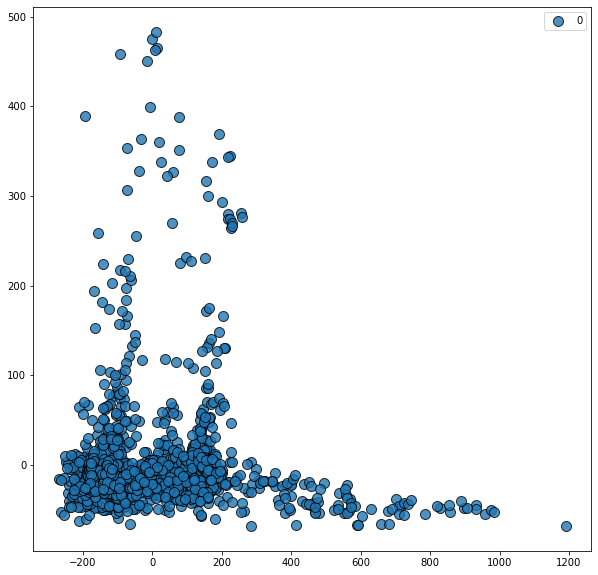

In [ ]:
show_2d_scatter(data)

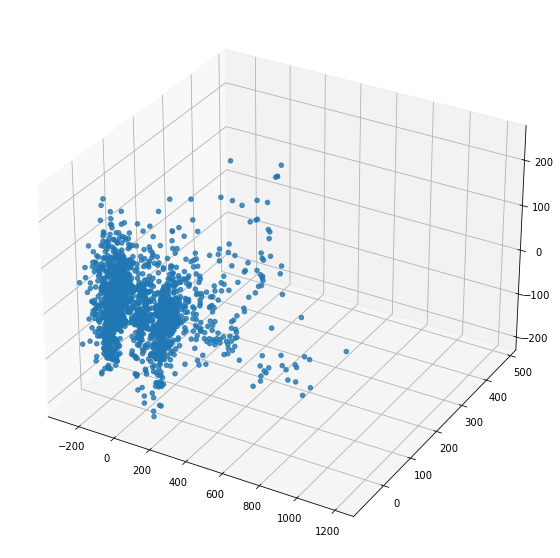

In [ ]:
show_3d_scatter(data)